In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime 

from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from main import *

In [5]:
import xarray as xr
import os 
infile = 'C:\\Users\\LuizF\\Downloads\\scnLv1_repro2013_2007_002\\'

_, _, files = next(os.walk(infile))

files

['scnLv1_C002.2007.002.00.16.0003.G18.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.16.0003.G25.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.16.0005.G02.00_2013.3520_nc',
 'scnLv1_C002.2007.002.00.16.0005.G31.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.16.0006.G11.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.16.0008.G22.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.16.0012.G01.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.16.0017.G20.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.16.0019.G14.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.16.0021.G30.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.17.0001.G25.02_2013.3520_nc',
 'scnLv1_C002.2007.002.00.18.0026.G05.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.19.0001.G10.03_2013.3520_nc',
 'scnLv1_C002.2007.002.00.19.0017.G10.00_2013.3520_nc',
 'scnLv1_C002.2007.002.00.19.0026.G12.01_2013.3520_nc',
 'scnLv1_C002.2007.002.00.20.0001.G31.02_2013.3520_nc',
 'scnLv1_C002.2007.002.00.21.0001.G11.02_2013.3520_nc',
 'scnLv1_C002.2007.002.00.21.0028.G17.01_2013.35

<xarray.Dataset>
Dimensions:    (time: 141)
Coordinates:
  * time       (time) float64 8.517e+08 8.517e+08 ... 8.517e+08 8.517e+08
Data variables:
    S4         (time) float32 ...
    elevation  (time) float64 ...
    sqrt_I     (time) float32 ...
    caL1_SNR   (time) float32 ...
    x_LEO      (time) float64 ...
    y_LEO      (time) float64 ...
    z_LEO      (time) float64 ...
    x_GPS      (time) float64 ...
    y_GPS      (time) float64 ...
    z_GPS      (time) float64 ...
Attributes: (12/42)
    processing_center:  UCAR/CDAAC
    creation_time:      25-JUN-14 18:46
    mission:            COSMIC
    dump_id:            2007.002.002.01
    leo_id:             2
    antenna_id:         1
    ...                 ...
    lon_start:          -62.008
    lct_start:          20.131
    alt_stop:           807.214
    lat_stop:           -53.119
    lon_stop:           -54.084
    lct_stop:           20.699

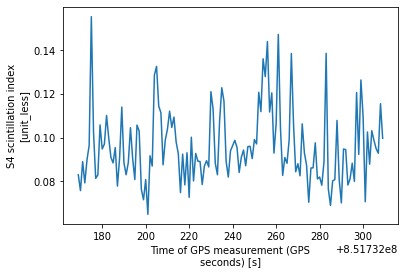

In [9]:
ds = xr.open_dataset(infile + files[0])
ds["S4"].plot()

ds

In [68]:
for hour in np.arange(0, 13):

    plt.ioff()

    fig, ax = plt.subplots(figsize = (8, 8), 
                           subplot_kw =dict(projection=ccrs.PlateCarree()))

    ax.set_global()

    states_provinces = cfeature.NaturalEarthFeature(
                category='cultural',
                name='admin_1_states_provinces_lines',
                scale='50m',
                facecolor='none')

    ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw = 1) 
    ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
    ax.add_feature(states_provinces, edgecolor='black')

    ax.gridlines(draw_labels=True, linewidth=1, color='lightgray')

    start_lat, end_lat = -40, 10
    start_lon, end_lon = -80, -30

    ax.set_extent([start_lon, end_lon, start_lat, end_lat], crs=ccrs.PlateCarree())

    #hour = 1

    for filename in files:
        if split_filename(filename).hour == hour:

            ds = xr.open_dataset(infile + filename)

            combined = datetime.datetime.combine(split_filename(filename).date, 
                                         split_filename(filename).time)

            time_str = combined.strftime("%H:%M")

            ds_mean = ds.mean()

            lat = ds_mean['GEO_lat'].values
            lon = ds_mean['GEO_lon'].values

            lat_cond = (lat > start_lat) and (lon > start_lon)

            lon_cond = (lat < end_lat) and (lon < end_lon)

            if lat_cond and lon_cond:

                ax.scatter(ds['GEO_lon'].values, ds['GEO_lat'].values, c = ds['TEC_cal'].values, 
                       cmap = 'jet', transform=ccrs.PlateCarree())

                ax.text(lon, lat, str(time_str), transform = ccrs.PlateCarree(), fontsize = 12)

    ax.set(title = f"Time: {hour} UTC", xlabel = 'Longitude (°)', ylabel = 'Latitude (°)')



    ax.scatter(-43.25, -13.11, s = 100, marker = 'X', color = 'k', 
               transform = ccrs.PlateCarree(), label = 'Bom Jesus da Lapa')

    ax.scatter(-36, -7, s = 100, marker = '^', color = 'red', 
               transform = ccrs.PlateCarree(), label = 'São João do Cariri')

    ax.scatter(-45, -23, s = 100, marker = 'o', color = 'blue', 
               transform = ccrs.PlateCarree(), label = 'Cachoeira Paulista')

    ax.legend()

    FigureName = f"{split_filename(filename).date}_{hour}.png"

    fig.savefig('2020_12_12/' + FigureName,  dpi = 100, bbox_inches="tight")

    plt.close(fig)

In [58]:
start_lat, end_lat = -40, 10
start_lon, end_lon = -80, -30

for filename in files:
    if split_filename(filename).hour == hour:

        ds = xr.open_dataset(infile + filename)

        combined = datetime.datetime.combine(split_filename(filename).date, 
                                         split_filename(filename).time)

        time_str = combined.strftime("%H:%M")

        ds_mean = ds.mean()

        lat = ds_mean['GEO_lat'].values
        lon = ds_mean['GEO_lon'].values

        lat_cond = (lat > start_lat) and (lon > start_lon)

        lon_cond = (lat < end_lat) and (lon < end_lon)

        if lat_cond and lon_cond:
            print(ds.max())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])